In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import  tqdm
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
x, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

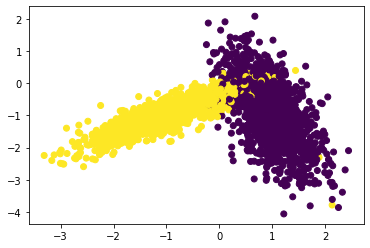

In [3]:
colors = { 0: 'red', 1: 'blue'}
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

In [4]:
def RandomSearchCV(x_train, y_train, classifier, param_range, folds):
    params = sorted(random.sample(range(1, param_range), 10))

    train_scores = []
    test_scores = []

    params_classifiers = { 'n_neighbors': params }

    for k in tqdm(params_classifiers['n_neighbors']):
        train_scores_folds = []
        test_scores_folds = []

        for j in range(0, folds):
            no_of_element_in_each_fold = int(len(x_train) / folds)
            test_indices = list(set(list(range((no_of_element_in_each_fold * j), (no_of_element_in_each_fold*(j+1))))))
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices) )

            xtrain_fold = x_train[train_indices]
            ytrain_fold = y_train[train_indices]
            xtest_fold = x_train[test_indices]
            ytest_fold = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(xtrain_fold, ytrain_fold)

            y_predicted = classifier.predict(xtest_fold)
            test_scores_folds.append(accuracy_score(ytest_fold, y_predicted))

            y_predicted = classifier.predict(xtrain_fold)
            train_scores_folds.append(accuracy_score(ytrain_fold, y_predicted))

        train_scores.append(np.mean(np.array(train_scores_folds)))
        test_scores.append(np.mean(np.array(test_scores_folds)))

    return train_scores, test_scores, params_classifiers

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
params_range = 50
folds = 3

testscores, trainscores, params = RandomSearchCV(X_train, y_train, neigh, params_range, folds)

print('trainscores are: ', trainscores)
print('testscores are: ', testscores)

100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

trainscores are:  [0.9500000000000001, 0.9542666666666667, 0.9558666666666668, 0.9542666666666667, 0.9553333333333334, 0.9561333333333334, 0.9558666666666666, 0.9564, 0.9566666666666667, 0.9570666666666666]
testscores are:  [0.9624666666666667, 0.9586666666666667, 0.9588, 0.9581333333333334, 0.9575333333333335, 0.9573333333333333, 0.9573333333333333, 0.9577999999999999, 0.9577333333333332, 0.9576666666666668]


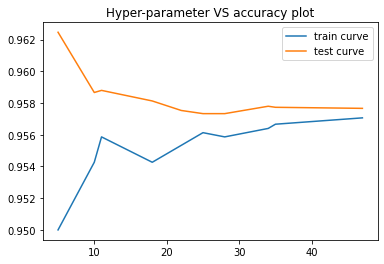

In [6]:
plt.plot(params['n_neighbors'], trainscores, label='train curve')
plt.plot(params['n_neighbors'], testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [7]:
def plot_decision_boundary(X1, X2, y, clf):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

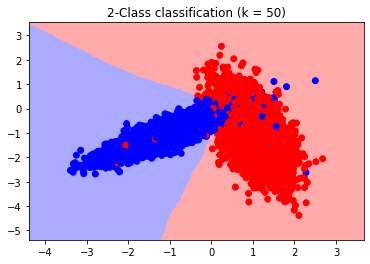

In [8]:
neigh = KNeighborsClassifier(n_neighbors = 50)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)